# STUDENT PERFORMANCE DATA SET PROJECT

# IMPORTING LIBRARIES

In [73]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
df = pd.read_csv("../data/student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,letter_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,C
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,A
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,C
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,C


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        649 non-null    object
 1   sex           649 non-null    object
 2   age           649 non-null    int64 
 3   address       649 non-null    object
 4   famsize       649 non-null    object
 5   Pstatus       649 non-null    object
 6   Medu          649 non-null    int64 
 7   Fedu          649 non-null    int64 
 8   Mjob          649 non-null    object
 9   Fjob          649 non-null    object
 10  reason        649 non-null    object
 11  guardian      649 non-null    object
 12  traveltime    649 non-null    int64 
 13  studytime     649 non-null    int64 
 14  failures      649 non-null    int64 
 15  schoolsup     649 non-null    object
 16  famsup        649 non-null    object
 17  paid          649 non-null    object
 18  activities    649 non-null    object
 19  nursery 

# PRE-PROCESSING

# i) Missing Values

In [76]:
df.isnull().values.any() 

False

# ii) Variable Transformation

# One Hot Transformation

In [77]:
clmns = ['reason','Mjob','Fjob','guardian']
df2 = pd.concat([df, pd.get_dummies(df[clmns])], axis=1).drop(clmns, axis = 1)
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,0,0,0,0,1,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,0,0,0,0,1,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,1,3,...,1,0,0,0,1,0,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,1,2,...,0,1,0,0,0,1,0,0,1,0
646,MS,F,18,U,GT3,T,1,1,2,2,...,0,0,0,0,1,0,0,0,1,0
647,MS,M,17,U,LE3,T,3,1,2,1,...,1,0,0,0,0,1,0,0,1,0


# 0-1 Transformation

In [78]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
clms = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for i in clms:
    df2[i] = lbe.fit_transform(df2[i])
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,0,0,1,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,0,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,...,1,0,0,0,1,0,0,0,1,0
645,1,0,18,1,1,1,3,1,1,2,...,0,1,0,0,0,1,0,0,1,0
646,1,0,18,1,0,1,1,1,2,2,...,0,0,0,0,1,0,0,0,1,0
647,1,1,17,1,1,1,3,1,2,1,...,1,0,0,0,0,1,0,0,1,0


# iii) Outlier Data 

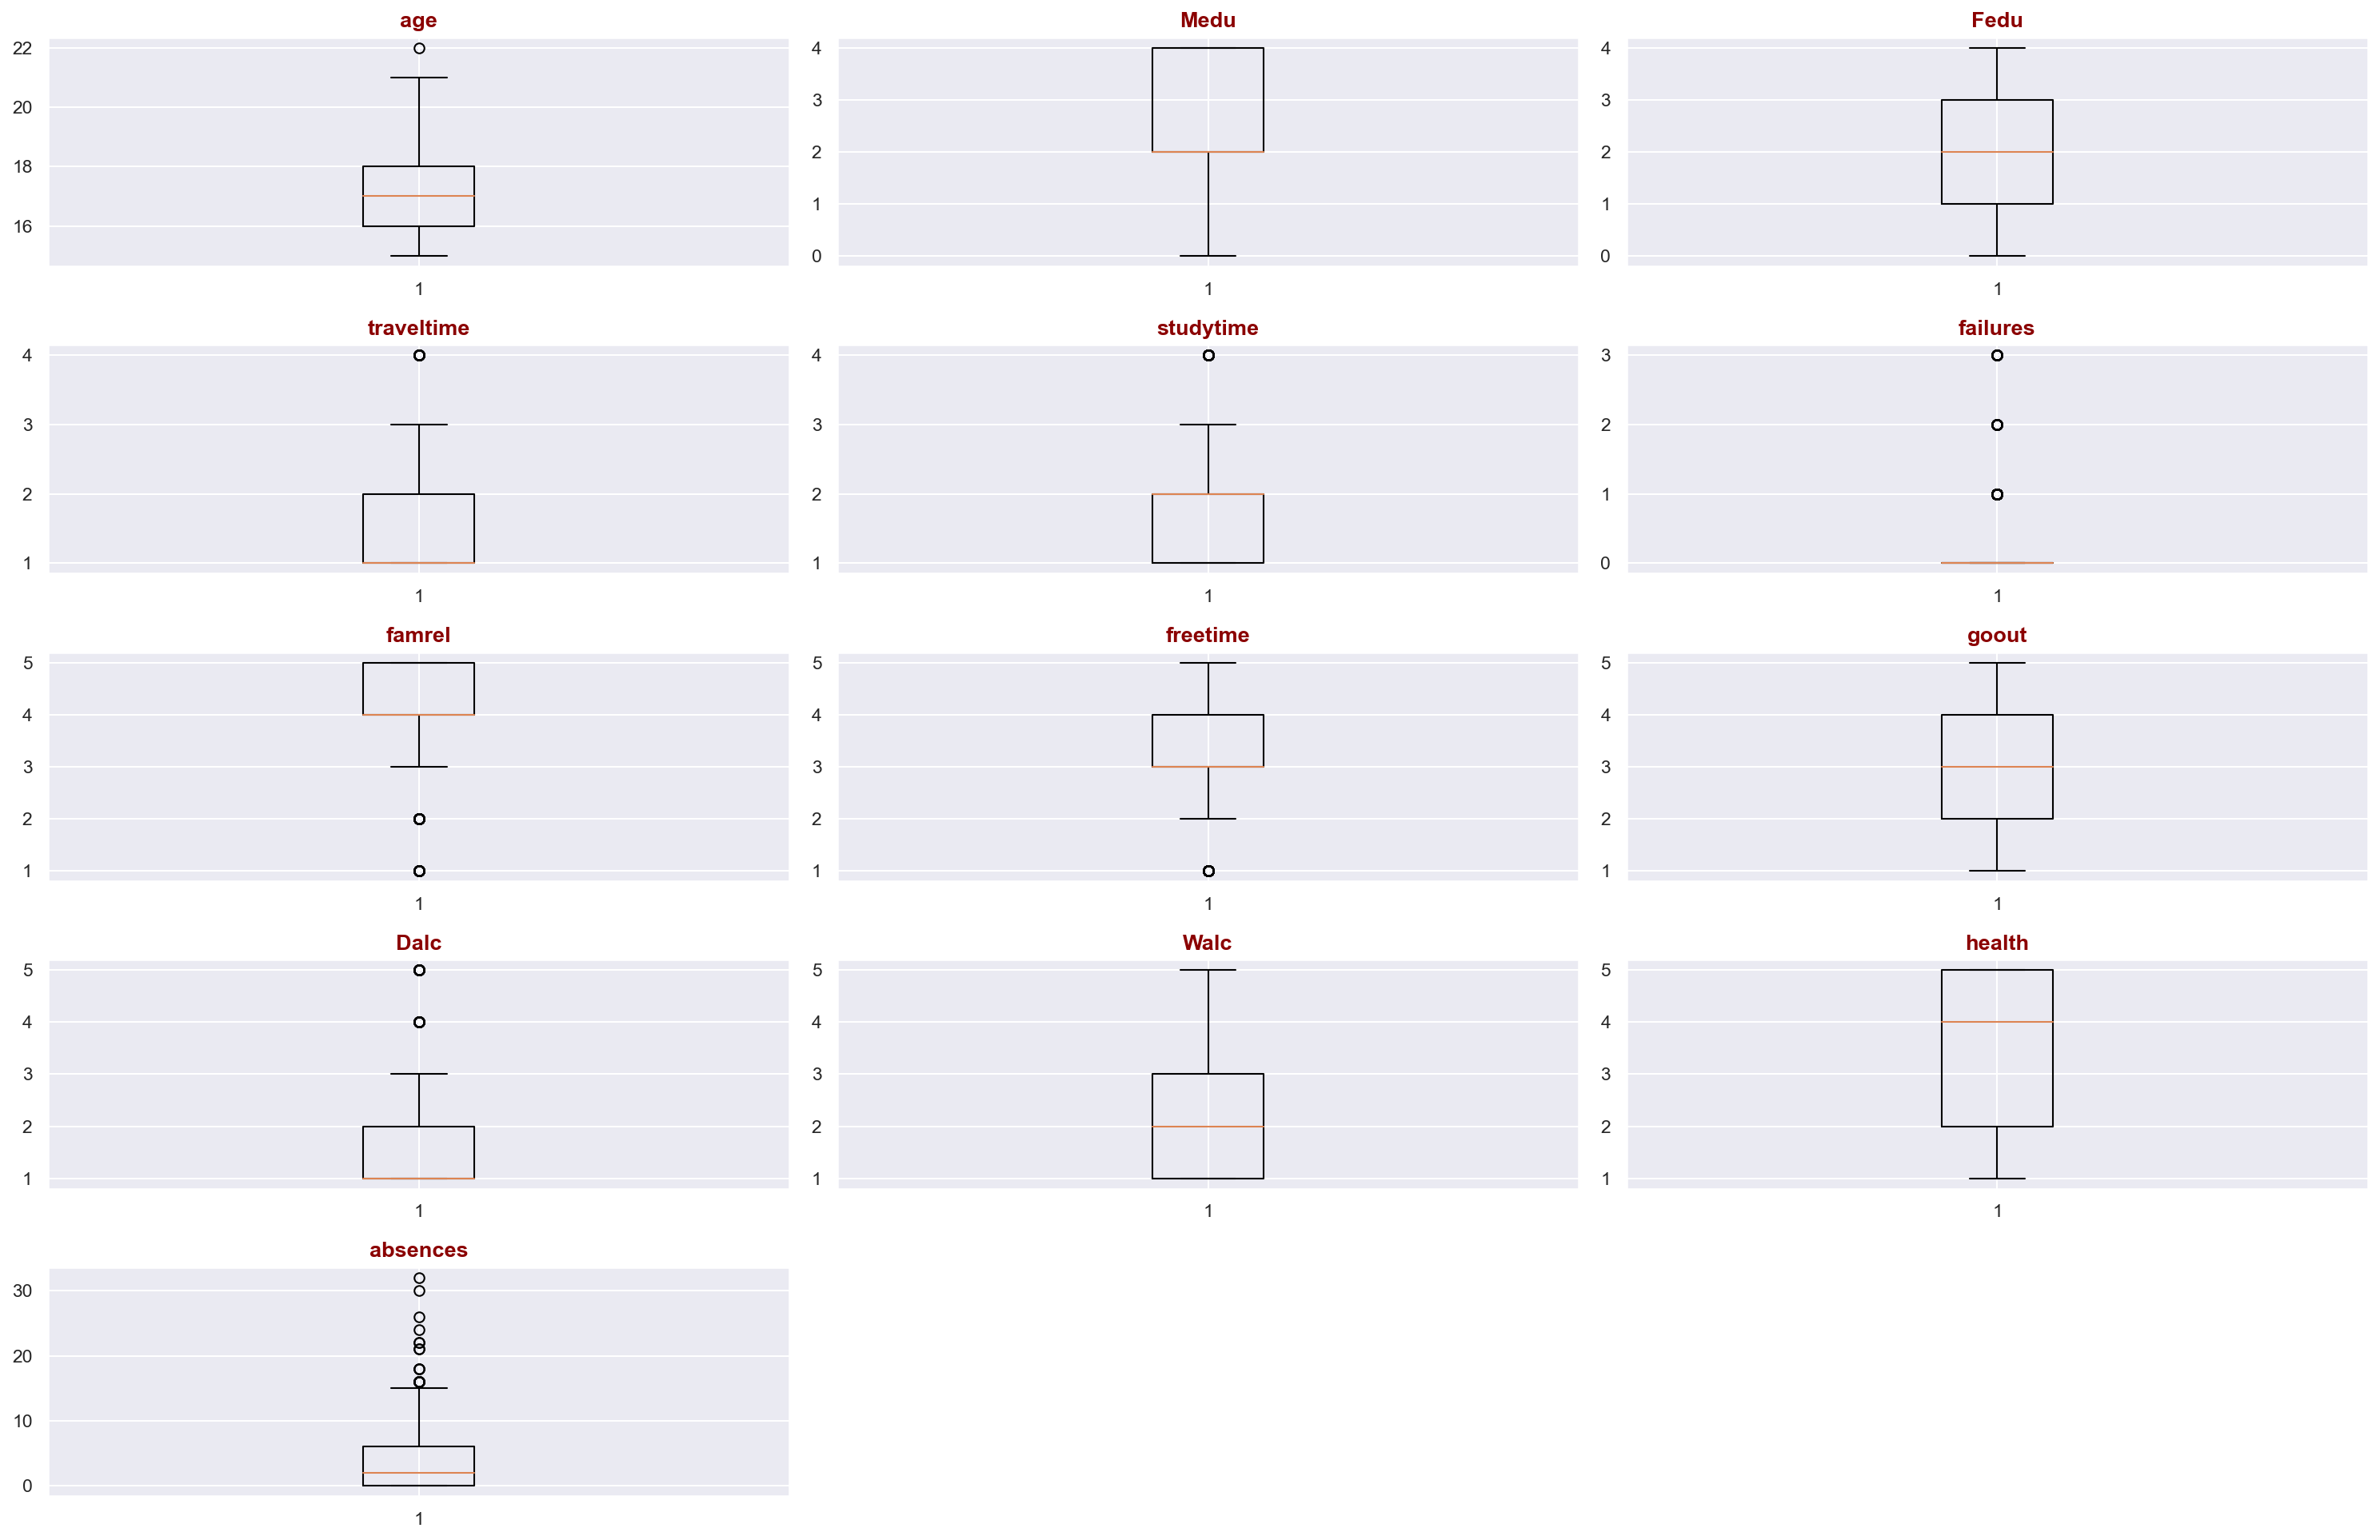

In [79]:
import matplotlib.pyplot as plt
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,13),dpi=150)
fill_list=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
for i,col in enumerate(fill_list):
    plt.subplot(5,3,i+1)
    plt.boxplot(col, data=df2)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

# Suppression method

In [83]:
c = ['age','traveltime','studytime','failures','Dalc','absences']
for col in c :
    df2_col = df2[col]
    Q1 = df2_col.quantile(0.25) #first interquartile range
    Q3 = df2_col.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_col_higher = (df2_col > high_limit) #outlier data greater than the upper limit
    df2_col[outliers_col_higher] = high_limit 

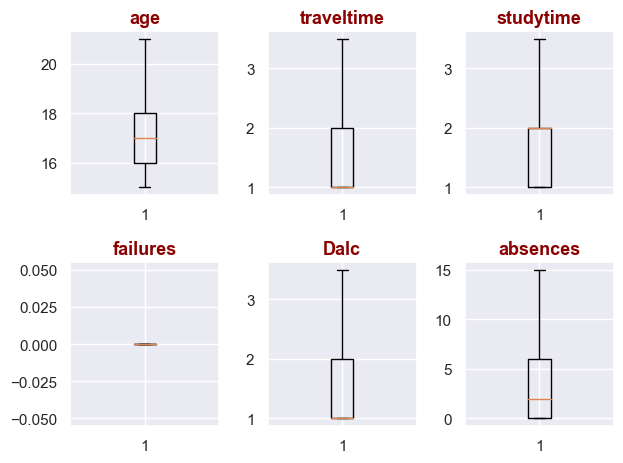

In [84]:
for i,col in enumerate(c):
    plt.subplot(2,3,i+1)
    plt.boxplot(col, data=df2)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

In [85]:
col = ['famrel','freetime']
for c in col :
    df2_c = df2[c]
    Q1 = df2_c.quantile(0.25) #first interquartile range
    Q3 = df2_c.quantile(0.75) #third interquartile range
    IQR = Q3-Q1   #IQR formula
    low_limit = Q1 - 1.5*IQR #low limit formula
    high_limit = Q3 + 1.5*IQR #high limit formula
    outliers_c_lower = (df2_c < low_limit) #outlier data lesser than the lower limit
    df2_c[outliers_c_lower] = low_limit 

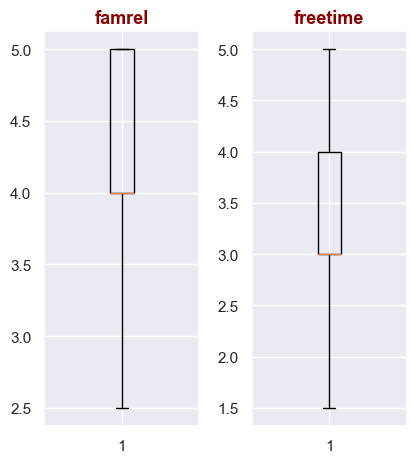

In [86]:
for i,colum in enumerate(col):
    plt.subplot(1,3,i+1)
    plt.boxplot(colum, data=df2)
    plt.title(colum,fontdict=baslik_font)
plt.tight_layout()
plt.show()

# Saving of preprocessed data

In [87]:
#df2.to_csv("C:/Users/Vinay Maske/Downloads/VIT Downloads/DMTProjectNEW/Student-Performance-Dataset-Project-master - EditedFinal/Student-Performance-Dataset-Project-master/Data/portPP.csv")

# Correlation

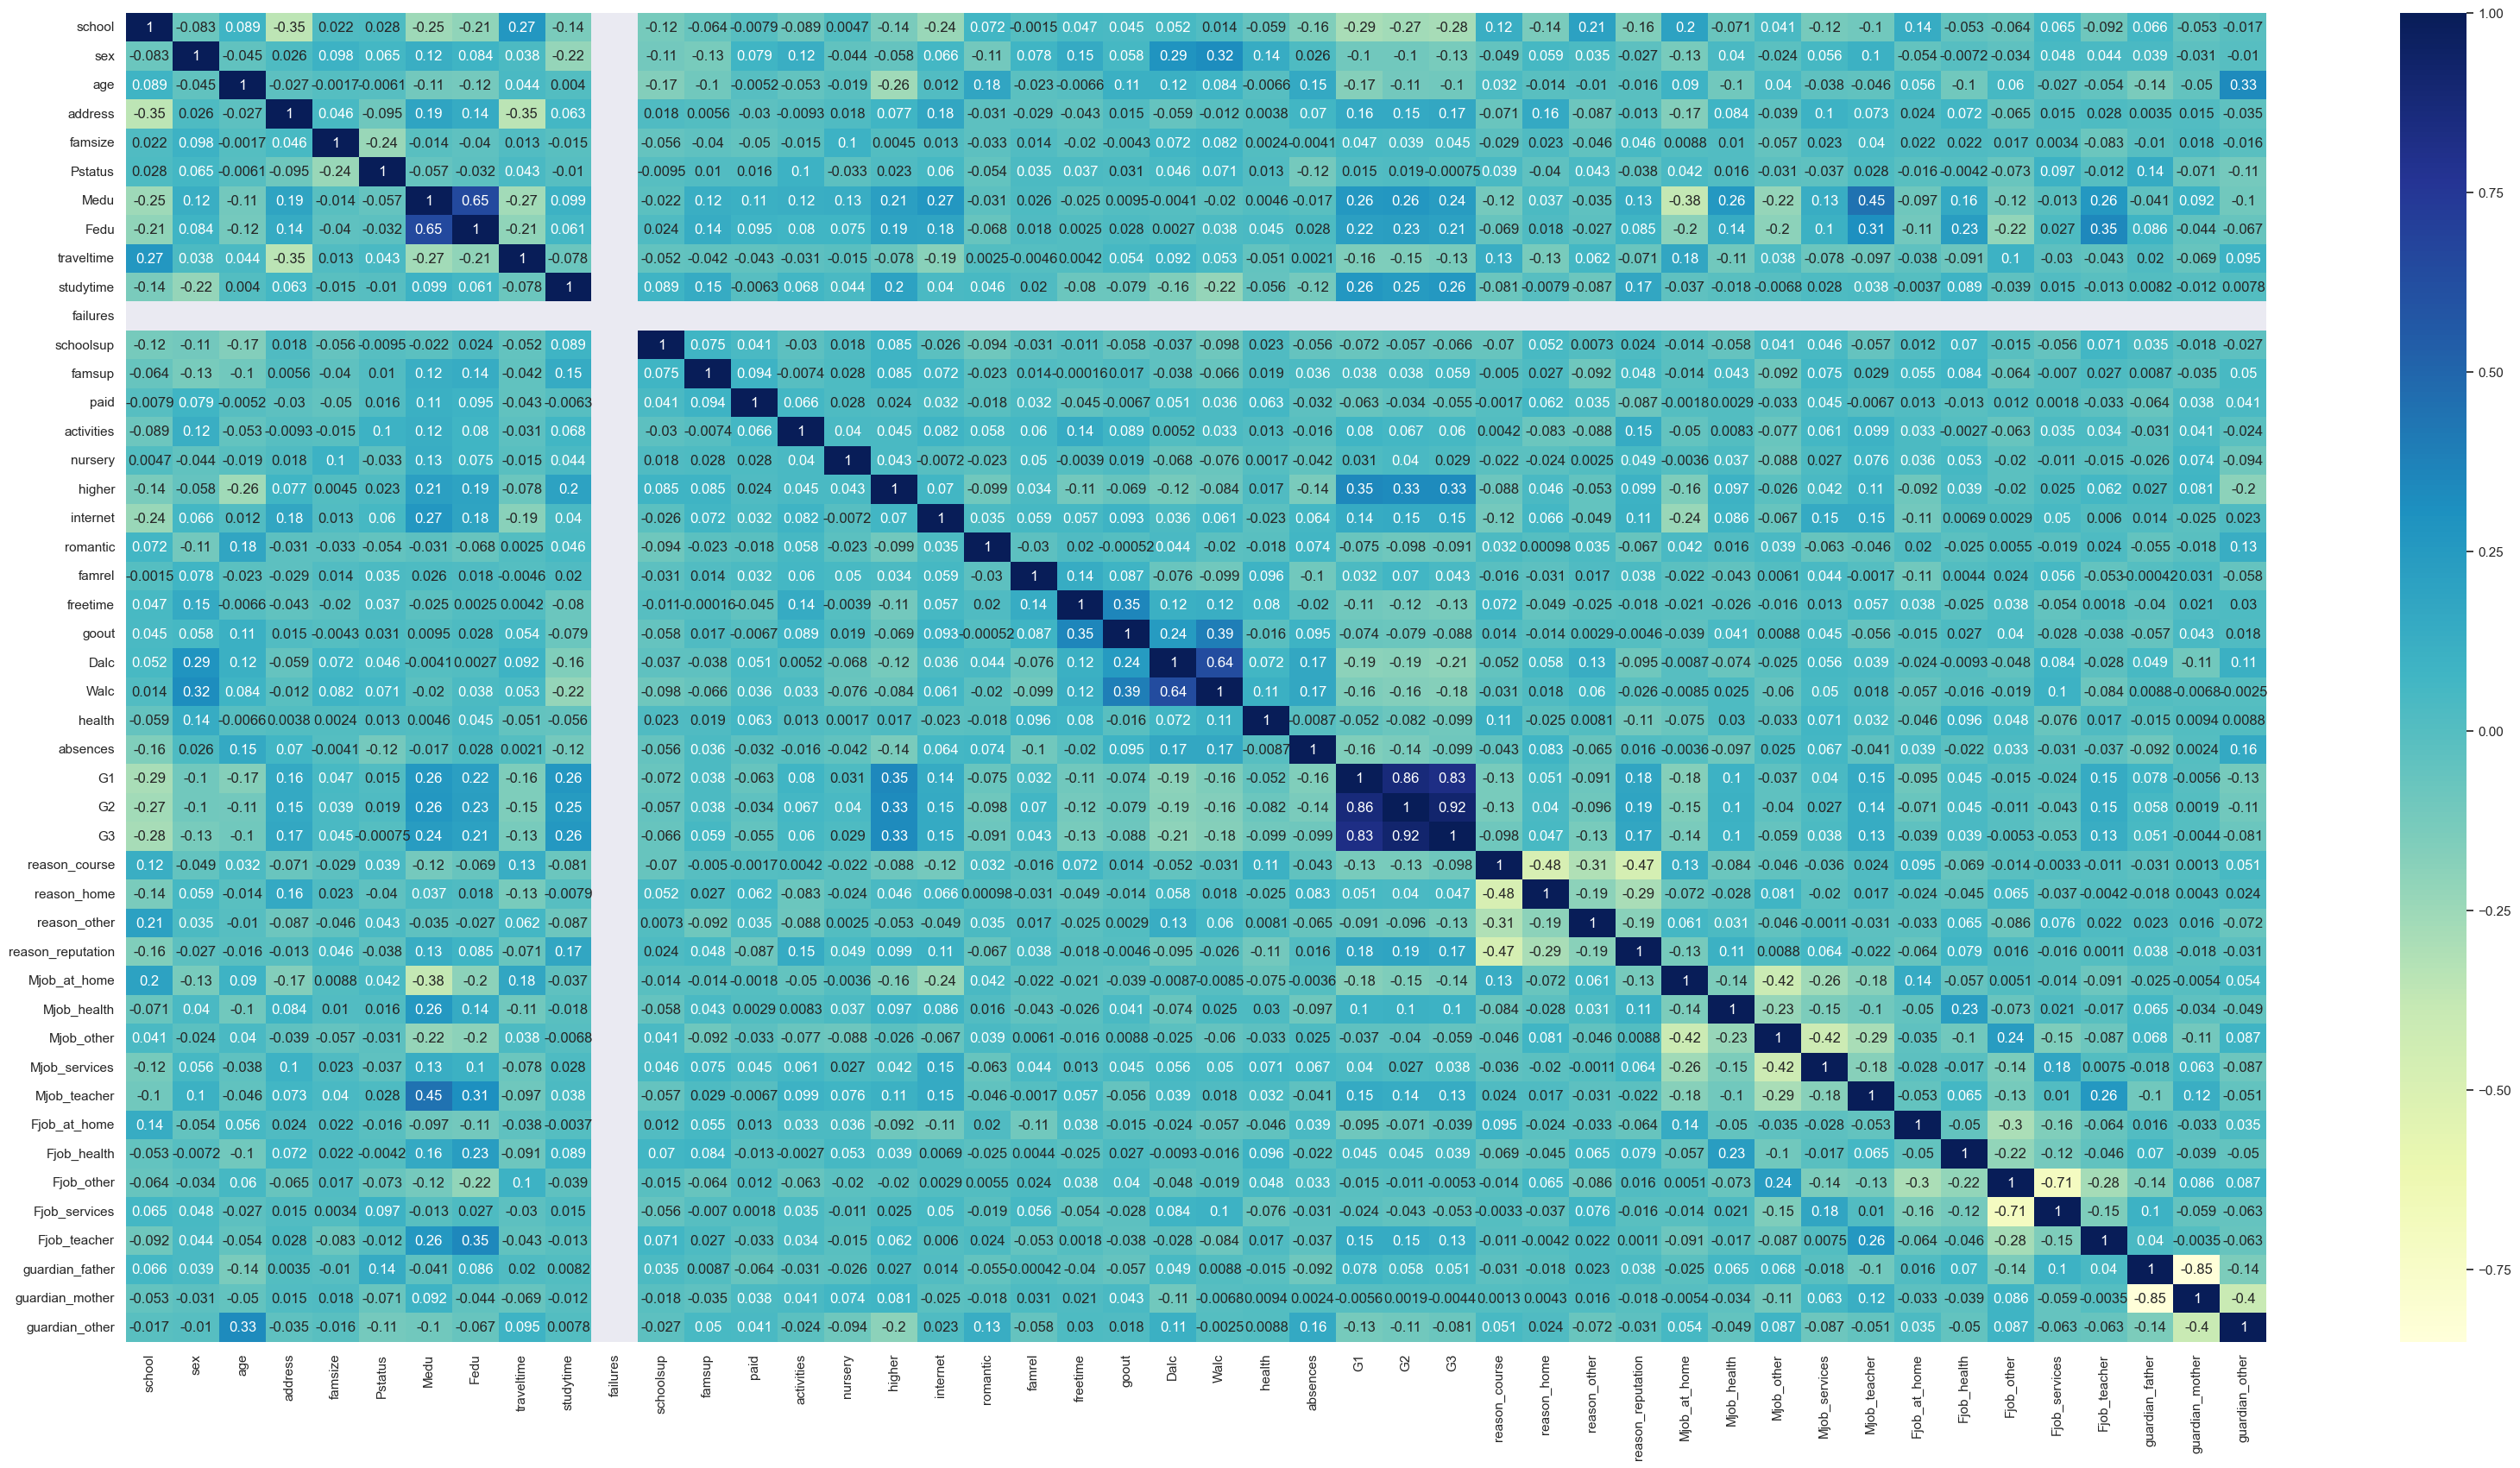

In [122]:
plt.figure(figsize=(40,20))
sns.heatmap(df2.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# ALGORITHMS

In [88]:
dfps = pd.read_csv("../data/csv_result-port_preprocessed_PCA(lettergrade)SMOTE7(randomize).csv", sep=',') #fetch pca, smote data
dfps

,id,0.338g1+0.335g2+0.329g3+0.282medu-0.264school...,-0.372walc-0.346dalc-0.318sex-0.227medu-0.222goout...,'0.459fjob_other-0.346fjob_services-0.29school-0.277guardian_father+0.27,-0.584guardian_mother+0.513guardian_father+0.264mjob_other+0.205guardian_other-0.197mjob_teacher...,-0.363schoolsup+0.335attribute_0+0.298age+0.292g2+0.278g3...,0.383guardian_other+0.373age+0.271absences+0.262romantic+0.233fjob_at_home...,-0.386reason_course+0.379fjob_services+0.297mjob_services-0.289fjob_teacher-0.256mjob_teacher...,-0.405reason_course+0.353reason_other-0.27mjob_services+0.267reason_home-0.261activities...,0.484reason_reputation+0.308fjob_health-0.276reason_home+0.267mjob_health-0.206reason_course...,...,-0.544higher-0.367absences+0.294famsup+0.236fjob_teacher-0.196schoolsup...,-0.367famrel-0.342higher-0.32traveltime-0.303studytime-0.281fjob_at_home...,-0.475activities-0.32address-0.296famsize-0.274fjob_teacher+0.272romantic...,-0.33internet-0.329studytime-0.312paid+0.257famrel-0.245traveltime...,-0.399higher+0.342studytime-0.307address-0.3fjob_health+0.295mjob_health...,0.399pstatus+0.368famsize+0.344freetime-0.285internet+0.283absences...,0.374address+0.365mjob_teacher+0.338traveltime-0.316internet+0.247paid...,-0.498sex+0.274famsize-0.272schoolsup+0.262pstatus+0.255goout...,-0.528fedu+0.344fjob_teacher-0.285traveltime+0.219absences+0.216mjob_health...,letter_grade
0,1,-2.006425,0.301748,2.200991,-0.571383,-0.185070,1.032285,-0.894443,0.186076,1.871559,...,1.263042,0.150617,0.260315,-1.089990,1.162170,-0.365044,0.184499,0.267750,-0.510251,C
1,2,2.866397,-0.994749,1.042281,-0.048640,0.974071,-0.585775,0.544190,0.651026,0.715090,...,-0.152403,-0.216395,-0.930664,0.940527,1.522547,-0.772955,-0.415287,0.481374,0.350478,B
2,3,0.464511,1.330857,-0.456980,1.080263,-0.514045,1.553059,-1.040480,-0.741805,-0.240292,...,-0.543211,-0.604756,-0.852977,-0.115403,0.327435,0.115931,-0.566193,-0.239297,-0.240933,B
3,4,3.056178,-0.090312,-1.244648,-1.673255,1.194274,2.232050,-2.914030,0.712166,-1.602642,...,1.090897,-1.253921,-0.464778,-1.224778,-0.004255,-0.458960,0.999201,0.263999,0.520705,B
4,5,-5.049729,0.735151,0.137143,-1.443969,-1.845353,-0.491325,-0.660957,1.263949,0.303948,...,0.333529,-0.122730,-0.232745,0.686811,-0.854650,0.067260,-0.695067,-0.255763,-0.233267,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1326,-0.030947,0.993482,-0.457585,-0.465660,0.770275,-2.648662,0.165905,1.387483,1.129503,...,-0.560726,-1.073831,0.551665,0.240806,-0.535756,-0.520457,1.956867,-0.477021,0.218606,B
1326,1327,1.188713,1.032150,1.886714,2.088246,0.687742,2.432211,-0.595941,-0.679495,2.599972,...,-0.524453,-0.361859,-1.036375,0.568699,-0.445101,0.351937,-1.237685,0.617945,-0.069206,B
1327,1328,3.500761,0.495913,-1.577698,-0.793408,0.810326,-0.850441,-1.088143,2.044158,0.648061,...,0.753721,0.956425,-1.080170,-0.092752,1.560729,0.825932,-0.453909,1.009866,1.047797,A
1328,1329,-4.506077,-0.207559,0.376807,-0.686336,0.377178,-1.773578,0.931531,1.314953,1.502555,...,-0.962067,-0.456489,-0.854013,-0.364224,-0.339702,0.198134,-0.462361,-0.286773,-0.362300,D


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [89]:
y = dfps["letter_grade"]
x = dfps.drop(["letter_grade"], axis=1)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    stratify=y)
#70% train and 30% test

In [95]:
x_test 

,id,0.338g1+0.335g2+0.329g3+0.282medu-0.264school...,-0.372walc-0.346dalc-0.318sex-0.227medu-0.222goout...,'0.459fjob_other-0.346fjob_services-0.29school-0.277guardian_father+0.27,-0.584guardian_mother+0.513guardian_father+0.264mjob_other+0.205guardian_other-0.197mjob_teacher...,-0.363schoolsup+0.335attribute_0+0.298age+0.292g2+0.278g3...,0.383guardian_other+0.373age+0.271absences+0.262romantic+0.233fjob_at_home...,-0.386reason_course+0.379fjob_services+0.297mjob_services-0.289fjob_teacher-0.256mjob_teacher...,-0.405reason_course+0.353reason_other-0.27mjob_services+0.267reason_home-0.261activities...,0.484reason_reputation+0.308fjob_health-0.276reason_home+0.267mjob_health-0.206reason_course...,...,'0.457schoolsup+0.424internet-0.327studytime+0.27,-0.544higher-0.367absences+0.294famsup+0.236fjob_teacher-0.196schoolsup...,-0.367famrel-0.342higher-0.32traveltime-0.303studytime-0.281fjob_at_home...,-0.475activities-0.32address-0.296famsize-0.274fjob_teacher+0.272romantic...,-0.33internet-0.329studytime-0.312paid+0.257famrel-0.245traveltime...,-0.399higher+0.342studytime-0.307address-0.3fjob_health+0.295mjob_health...,0.399pstatus+0.368famsize+0.344freetime-0.285internet+0.283absences...,0.374address+0.365mjob_teacher+0.338traveltime-0.316internet+0.247paid...,-0.498sex+0.274famsize-0.272schoolsup+0.262pstatus+0.255goout...,-0.528fedu+0.344fjob_teacher-0.285traveltime+0.219absences+0.216mjob_health...
247,248,0.005261,1.741203,1.443822,-0.914147,-0.199045,0.729086,1.023783,-1.426820,1.635703,...,-1.297564,-0.404904,0.265887,-0.640266,-0.226531,-0.227492,0.580531,0.980110,-0.199810,0.650294
966,967,-1.904842,0.925517,1.428509,-0.703764,-0.317876,-1.062633,0.023843,1.564392,0.621613,...,1.356617,0.079479,0.940010,0.185826,-0.025438,-0.489879,0.806656,-0.466084,1.161477,0.368579
1144,1145,4.140225,-1.008978,-0.972777,-0.109543,2.613658,2.120717,-1.279205,2.739197,-3.009544,...,1.064700,1.265912,0.337088,-0.253462,0.020972,-1.045532,1.578265,0.362558,-0.546274,0.540678
87,88,-1.588375,1.389672,0.241798,-1.122466,-0.598558,-1.610630,-0.855556,-0.395124,-2.082238,...,0.105169,-0.305292,-1.293516,0.856206,-0.005992,0.019845,0.272124,-0.062376,0.410952,-0.769572
991,992,0.822792,0.331639,1.160017,-1.591116,-3.032502,-0.516008,-0.094593,-1.835093,0.637105,...,-0.049218,0.315625,-0.788232,0.239674,0.192100,0.786287,-0.226689,0.059009,-0.278949,0.613018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1148,-1.444021,0.909999,-1.368949,-1.620025,0.100775,0.684747,0.683374,-1.261719,-0.582595,...,0.988251,0.188771,-0.757905,-0.126893,-1.559560,0.294161,0.923951,-1.156942,-0.727485,-0.498684
417,418,-5.061893,-2.893180,0.075089,0.804240,-1.198041,0.501644,3.247524,0.506003,0.174911,...,0.268511,1.093081,-1.153997,0.500768,0.156771,0.972863,0.604176,1.080410,0.292955,0.581135
1017,1018,-2.294968,1.385715,-1.359727,0.287890,0.126014,-0.483766,-1.946927,-0.440565,0.468267,...,-0.035401,-0.731239,0.645438,0.682067,-0.344029,-0.836945,1.266212,-0.213698,0.627560,0.557315
595,596,0.142609,0.355210,0.915528,2.046004,-0.167794,-0.071616,-1.588366,-0.871077,-0.386695,...,0.327656,0.659092,1.191962,-0.390916,-0.600069,-1.003280,0.884897,0.443886,0.935002,-0.793732


## 1. Naive Bayes 

In [96]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

In [97]:
nb_model.predict(x_test)[0:399]

array(['B', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'A', 'B', 'A', 'B', 'C',
       'B', 'B', 'B', 'C', 'B', 'A', 'A', 'A', 'C', 'D', 'B', 'B', 'B',
       'B', 'C', 'D', 'D', 'A', 'C', 'C', 'D', 'D', 'B', 'A', 'A', 'B',
       'B', 'D', 'B', 'A', 'C', 'C', 'B', 'C', 'C', 'B', 'A', 'D', 'C',
       'A', 'A', 'C', 'B', 'A', 'C', 'C', 'A', 'C', 'A', 'B', 'C', 'A',
       'A', 'C', 'C', 'B', 'D', 'A', 'D', 'C', 'B', 'A', 'A', 'B', 'B',
       'B', 'B', 'C', 'D', 'B', 'D', 'B', 'D', 'B', 'C', 'C', 'D', 'C',
       'A', 'D', 'D', 'C', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'A', 'D',
       'C', 'A', 'C', 'D', 'D', 'A', 'C', 'A', 'C', 'A', 'A', 'D', 'A',
       'C', 'A', 'D', 'B', 'D', 'D', 'C', 'A', 'A', 'D', 'A', 'B', 'A',
       'C', 'B', 'D', 'B', 'D', 'C', 'B', 'B', 'C', 'B', 'B', 'D', 'A',
       'D', 'A', 'A', 'D', 'C', 'B', 'D', 'A', 'B', 'A', 'C', 'C', 'A',
       'B', 'D', 'A', 'D', 'A', 'B', 'B', 'D', 'D', 'B', 'B', 'B', 'B',
       'C', 'C', 'B', 'A', 'B', 'C', 'B', 'C', 'C', 'D', 'B', 'A

In [98]:
y_pred = nb_model.predict(x_test)

In [99]:
accuracy_score(y_test, y_pred)

0.7969924812030075

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.86      0.91      0.89        98
           B       0.66      0.67      0.66       111
           C       0.73      0.74      0.74       108
           D       1.00      0.91      0.96        82

    accuracy                           0.80       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.80      0.80      0.80       399



## 2. KNN 

### KNN Model Tuning

In [101]:
knn_params = {"n_neighbors": np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [102]:
print("Best score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best score:0.4650681386924271
Best Parameters: {'n_neighbors': 1}


In [103]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(x_train, y_train)

In [104]:
knn_tuned.score(x_test, y_test)

0.48120300751879697

In [105]:
y_pred = knn_tuned.predict(x_test)

In [106]:
accuracy_score(y_test, y_pred)

0.48120300751879697

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.52      0.55      0.53        98
           B       0.36      0.32      0.34       111
           C       0.42      0.46      0.44       108
           D       0.67      0.63      0.65        82

    accuracy                           0.48       399
   macro avg       0.49      0.49      0.49       399
weighted avg       0.48      0.48      0.48       399



## 3. SVM 

### SVM Model Tuning

In [108]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 5, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [109]:
print("Best Parameter: " + str(svc_cv_model.best_params_))

Best Parameter: {'C': 1}


In [110]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(x_train, y_train)

In [111]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9122807017543859

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.91      0.96      0.94        98
           B       0.88      0.80      0.84       111
           C       0.88      0.92      0.90       108
           D       0.99      1.00      0.99        82

    accuracy                           0.91       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.91      0.91      0.91       399



## 4. Random Forest

### Random Forest Model Tuning

In [42]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [43]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [113]:
rf_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [114]:
print("Best Parameter: " + str(rf_cv_model.best_params_))

Best Parameter: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [115]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, n_estimators=500)

In [116]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9072681704260651

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.96      0.97      0.96        98
           B       0.87      0.78      0.82       111
           C       0.83      0.91      0.87       108
           D       1.00      1.00      1.00        82

    accuracy                           0.91       399
   macro avg       0.92      0.92      0.91       399
weighted avg       0.91      0.91      0.91       399



In [118]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Varaibles Severity Level')

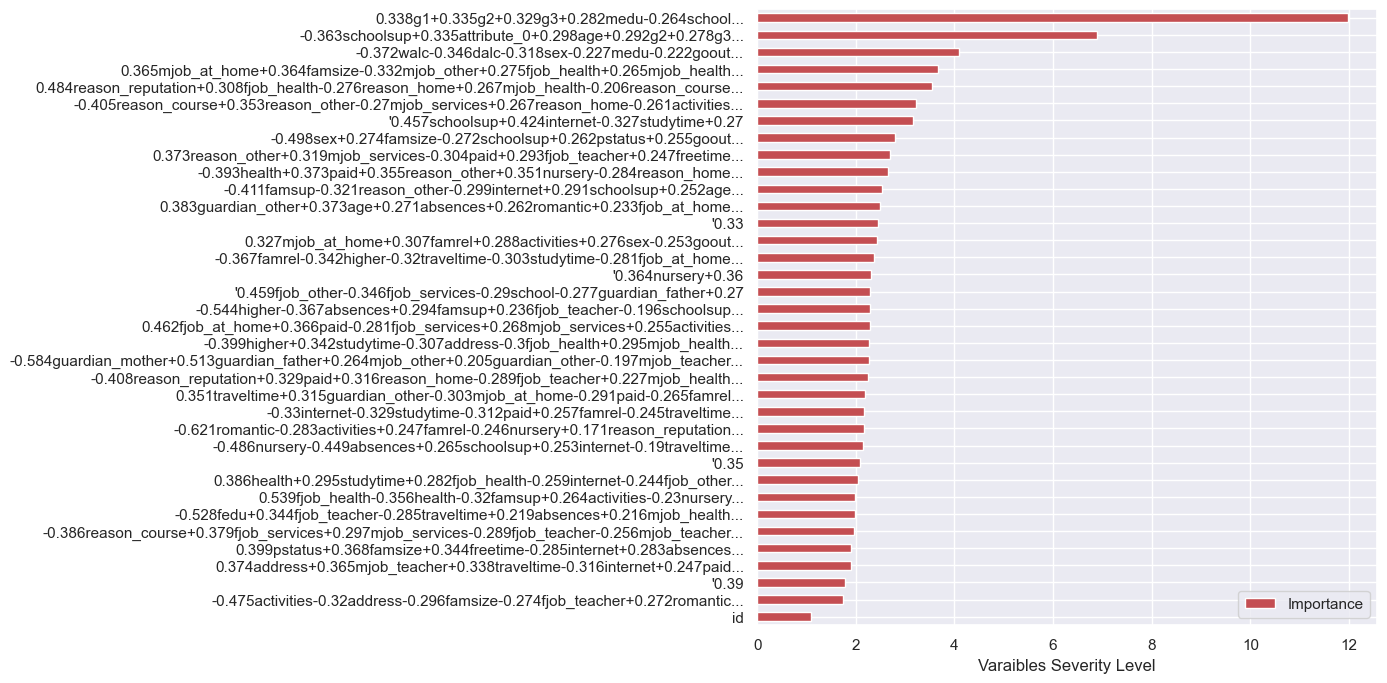

In [119]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r",figsize=(8,8))

plt.xlabel("Varaibles Severity Level")

# COMPARISON

In [120]:
Models = [
    knn_tuned,
    nb_model,
    svc_tuned,
    rf_tuned]

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))

----------------------------
KNeighborsClassifier:
Accuracy: 48.1203%
----------------------------
GaussianNB:
Accuracy: 79.6992%
----------------------------
SVC:
Accuracy: 91.2281%
----------------------------
RandomForestClassifier:
Accuracy: 90.7268%


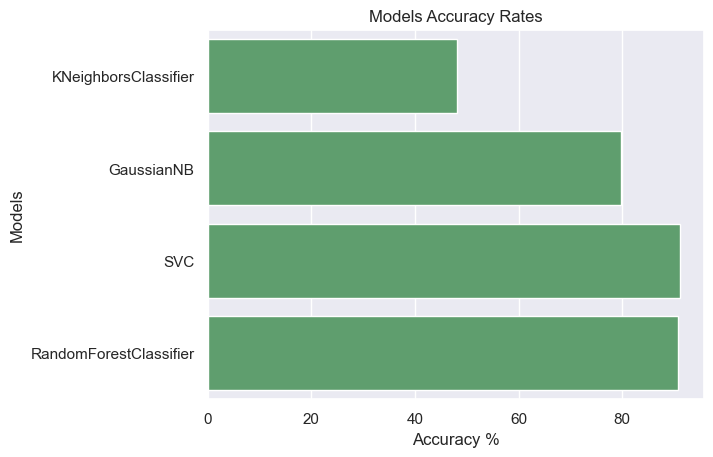

In [121]:
conclusion = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)    
    conclusion = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(conclusion)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="g")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Rates');    

In [150]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost after RF

In [152]:
adarf = AdaBoostClassifier(n_estimators=100, base_estimator=rf_tuned, learning_rate=1)
adarf_model = adarf.fit(x_train, y_train)

y_pred = adarf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9072681704260651

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.95      0.97      0.96        98
           B       0.90      0.75      0.82       111
           C       0.82      0.94      0.88       108
           D       1.00      1.00      1.00        82

    accuracy                           0.91       399
   macro avg       0.92      0.92      0.91       399
weighted avg       0.91      0.91      0.91       399



# AdaBoost after Naive Bayes

In [131]:
adanb = AdaBoostClassifier(n_estimators=100, base_estimator=nb_model , learning_rate=1)
adanb_model = adanb.fit(x_train, y_train)

y_pred = adanb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.6992481203007519

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.92      0.73      0.82        98
           B       0.51      0.63      0.56       111
           C       0.59      0.62      0.61       108
           D       1.00      0.85      0.92        82

    accuracy                           0.70       399
   macro avg       0.76      0.71      0.73       399
weighted avg       0.73      0.70      0.71       399



# AdaBoost only

In [158]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1)
ada_model = ada.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.42355889724310775

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        98
           B       0.40      0.68      0.50       111
           C       0.44      0.87      0.59       108
           D       0.00      0.00      0.00        82

    accuracy                           0.42       399
   macro avg       0.21      0.39      0.27       399
weighted avg       0.23      0.42      0.30       399



# COMPARISON - II

In [160]:
Models = [
    adarf_model,
    adanb_model,
    ada_model]
name = ['AdaBoost after Random Forest', 'AdaBoost after Naive Bayes',"AdaBoost only"]
i=0
for model in Models:
    names = name[i]
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))
    i=i+1

----------------------------
AdaBoost after Random Forest:
Accuracy: 90.7268%
----------------------------
AdaBoost after Naive Bayes:
Accuracy: 69.9248%
----------------------------
AdaBoost only:
Accuracy: 42.3559%


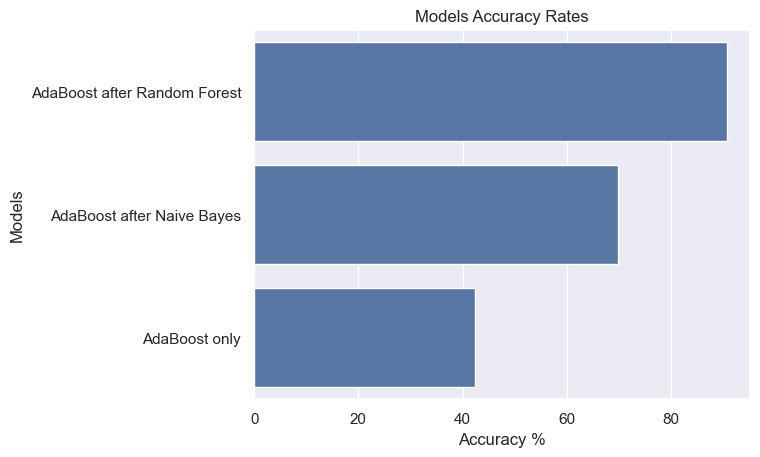

In [161]:
conclusion = []

results = pd.DataFrame(columns= ["Models","Accuracy"])
i=0
for model in Models:
    names = name[i]
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)    
    conclusion = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(conclusion)
    i=i+1
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Rates');  